In [87]:
#!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
"""
Aryan Sharma
Archit Ganapule
TA: Peter Xu
6/5/23
Final Project:
  Topic: How Has Climate Change Impacted Different Fish Locations?

  Purpose: This project's goal is to analyze the changes in fish locations
      over time and find out if there's a correlation with the annual
      temperature rise in the oceans over time. This program does this by
      providing visual formats to view the data as well as by creating a ML
      model that predicts latitude of a given fish species, temperature anomaly
      (temperate departure from expected value) for a specific year, and other
      factors. It then also tests the code, providing validity that the data
      and ML model all behave as expected.

  Oversimplifications: Since both of us aren't experts in this field, there
      must have been factors that we missed and that may have had a slight
      influence on the data.
      On top of that, these findings and analysis have
      all been done on datasets that are sparse in their
      datapoints. So we made choices that we thought were the most
      encompassing and important.
"""

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


"\nAryan Sharma\nArchit Ganapule\nTA: Peter Xu\n6/5/23\nFinal Project:\n  Topic: How Has Climate Change Impacted Different Fish Locations?\n\n  Purpose: This project's goal is to analyze the changes in fish locations\n      over time and find out if there's a correlation with the annual\n      temperature rise in the oceans over time. This program does this by\n      providing visual formats to view the data as well as by creating an ML\n      model that predicts latitude of a given fish species, temperature anomaly\n      (temperate departure from expected value) for a specific year, and other\n      factors. It then also tests the code, providing validity that the data\n      and ML model all behave as expected.\n\n  Oversimplifications: Since both of us aren't experts in this field, there\n      must have been factors that we missed and that may have had a slight\n      influence on the data.\n      On top of that, these findings and analysis have\n      all been done on datasets th

In [88]:
"""
This code cell reads in the file containing data for all the countries
"""
world_map = gpd.read_file('/content/ne_110m_admin_0_countries.shp')
world_map

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,Republic of Serbia,SRB,...,세르비아,Servië,Serbia,Sérvia,Сербия,Serbien,Sırbistan,Serbia,塞尔维亚,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,Montenegro,MNE,...,몬테네그로,Montenegro,Czarnogóra,Montenegro,Черногория,Montenegro,Karadağ,Montenegro,蒙特內哥羅,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Sovereign country,Kosovo,KOS,...,코소보,Kosovo,Kosowo,Kosovo,Республика Косово,Kosovo,Kosova,Kosovo,科索沃,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,Trinidad and Tobago,TTO,...,트리니다드 토바고,Trinidad en Tobago,Trynidad i Tobago,Trinidad e Tobago,Тринидад и Тобаго,Trinidad och Tobago,Trinidad ve Tobago,Trinidad và Tobago,千里達及托巴哥,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [89]:
"""
This code cell reads in the file containing data for all the locations
of different fish species. It filters it down to the expected columns and
allows for plotting.
"""
fish = pd.read_csv('/content/fish_locations.csv', encoding='latin-1')
fish = fish[['Species', 'Longitude', 'Latitude', 'Sample_date',
             'FAO_zone', 'Ecosystem']]
fish['geometry'] = [Point(-long, lat) for long, lat in
                    zip(fish['Longitude'], fish['Latitude'])]
fish = gpd.GeoDataFrame(fish, geometry='geometry')
fish.crs = world_map.crs
fish

,Species,Longitude,Latitude,Sample_date,FAO_zone,Ecosystem,geometry
0,Tinca_tinca,-72.687243,46.247876,2016,"America, North",Inland waters,POINT (72.68724 46.24788)
1,Tinca_tinca,-73.222222,45.835687,2016,"America, North",Inland waters,POINT (73.22222 45.83569)
2,Tinca_tinca,-73.633745,45.465107,2016,"America, North",Inland waters,POINT (73.63374 45.46511)
3,Tinca_tinca,-73.000000,45.793042,2016,"America, North",Inland waters,POINT (73.00000 45.79304)
4,Tinca_tinca,-73.082305,45.283543,2016,"America, North",Inland waters,POINT (73.08230 45.28354)
...,...,...,...,...,...,...,...
10660,Larimichthys_polyactis,122.043166,32.081312,2012,"Pacific, Northwest",Marine areas,POINT (-122.04317 32.08131)
10661,Larimichthys_polyactis,119.223022,34.993754,2012,"Pacific, Northwest",Marine areas,POINT (-119.22302 34.99375)
10662,Larimichthys_polyactis,120.517986,35.991244,2012,"Pacific, Northwest",Marine areas,POINT (-120.51799 35.99124)
10663,Larimichthys_polyactis,122.273381,36.545982,2012,"Pacific, Northwest",Marine areas,POINT (-122.27338 36.54598)


In [90]:
"""
This code cell reads in the file containing data for the temperature anomalies
and filters it to our focus columns.
"""
ocean = pd.read_csv('/content/ocean_anomalies.csv', encoding='latin-1')
ocean = ocean[['Year', 'Annual anomaly']]
ocean = ocean.astype({'Year': 'string'})
ocean

,Year,Annual anomaly
0,1880,-0.420
1,1881,-0.330
2,1882,-0.348
3,1883,-0.456
4,1884,-0.582
...,...,...
136,2016,0.930
137,2017,0.822
138,2018,0.732
139,2019,0.876


Text(0, 0.5, 'Annual Anomaly (Farenheit)')

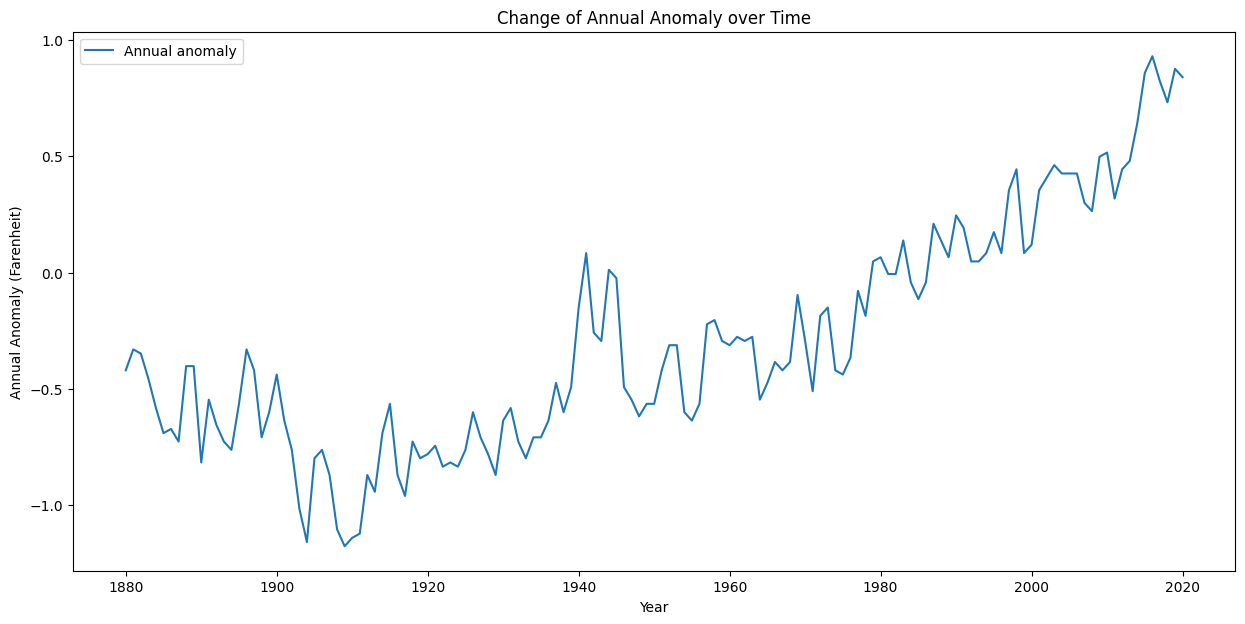

In [91]:
"""
The next two code cells inclduing this one are focused on plotting
and visualizing the data. This code cell plots the change in the annual
anomalies (temperature change from expected) over time. This plots
title is "Change of Annual Anomaly over Time" while its x-axis
is the Year and y-axis is the Annual Anomaly (in farenheit)
"""
fig, ax = plt.subplots(1, figsize=(15, 7))
anomaly_plot = ocean.astype({'Year': 'int'})
anomaly_plot.plot(ax=ax, x="Year", y="Annual anomaly")
plt.title("Change of Annual Anomaly over Time")
plt.xlabel('Year')
plt.ylabel('Annual Anomaly (Farenheit)')

Text(0.5, 1.0, 'Salmo_Trutta Location Over Time')

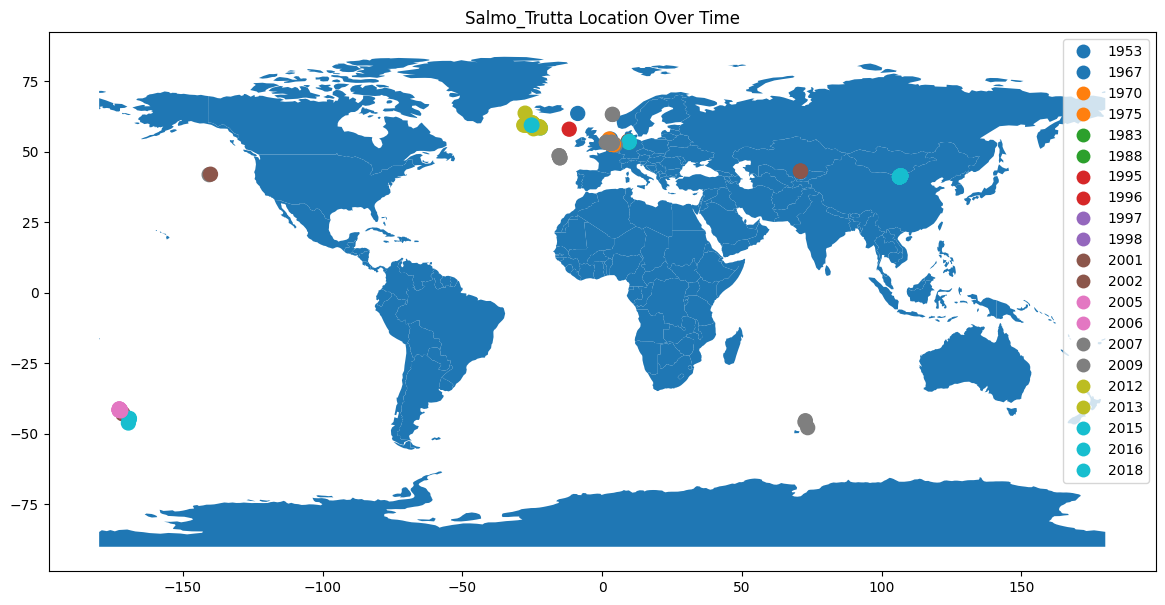

In [92]:
"""
This code cell compiles the fish and ocean datasets and plots a map of the
world, using the world data. After which, it plots a specifed specie's
(salmo_trutta) locations overlayed on the world map. The resulting figure's
title is "Salmo_Trutta Location Over Time"
"""
fish_ocean = ocean.merge(fish, left_on='Year', right_on='Sample_date',
                         how='right')
fish_ocean = gpd.GeoDataFrame(fish_ocean)

focean_ML = fish_ocean[['Year', 'Annual anomaly', 'Species', 'Latitude',
                        'FAO_zone', 'Ecosystem']]

fish_ocean = fish_ocean[['Year', 'Annual anomaly', 'Species', 'Longitude',
                         'Latitude', 'geometry']]

specie = fish_ocean[fish_ocean['Species'] == 'Salmo_trutta'].dropna(
         ).reset_index().drop(columns=['index', 'Species', 'Annual anomaly'])

fig, ax = plt.subplots(1, figsize=(15, 7))
world_map.plot(ax=ax)
specie.plot(ax=ax, column='Year', legend=True, markersize=100)
plt.title("Salmo_Trutta Location Over Time")

In [93]:
'''
This section creates the ML model used to predict fish latitudes, using a
linear regressor. It pre-processes data into features (species,
temperature anomaly, FAO_zone, and ecosystem) and labels
(corresponding latitudes). It uses Grid Search with cross-validation to find
the best parameters, then trains the model with those parameters and prints its
accuracy.
'''

# Cleans the dataset by removing nan values and only including related columns.
clean = focean_ML.dropna().reset_index().drop(columns='index')

# Creates one-hot encodings for the three string-based features (Species name,
# fishing zone (FAO_zone) and Ecosystem). Also creates a series for the integer
# based feature, temperature anomaly.
one_hot = pd.get_dummies(clean['Species'])
two_hot = pd.get_dummies(clean['FAO_zone'])
three_hot = pd.get_dummies(clean['Ecosystem'])
int_features = clean[['Annual anomaly']]

# Combines the features together, creates the labels series (Latitude), and
# does a train/test split.
features = pd.concat([one_hot, two_hot, three_hot,
                      int_features], axis=1)
labels = clean[['Latitude']]
X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2)

# Conducts a Grid Search with 5-fold cross validation on a regressor model with
# the given parameter options. Prints the best parameters and the resultant
# accuracy score.
model_coords_R = DecisionTreeRegressor()
params = {'max_depth': [110, 120, 125],
          'min_samples_leaf': [1, 2, 3],
          'min_samples_split': [2, 3, 4],
          }

GS = GridSearchCV(estimator=model_coords_R, param_grid=params, cv=5,
                  n_jobs=-1, verbose=True)
GS.fit(X_train, y_train)
print('\nBest Parameters:', GS.best_params_)
print('Best Score:', GS.best_score_, '\n')


# Creates a regressor with the parameters found from GS. Trains it on the data
# from the earlier split, then records training and testing predictions.
best_depth = GS.best_params_['max_depth']
best_leaf = GS.best_params_['min_samples_leaf']
best_split = GS.best_params_['min_samples_split']
model_coords_R = DecisionTreeRegressor(max_depth=best_depth,
                                       min_samples_leaf=best_leaf,
                                       min_samples_split=best_split)
model_coords_R.fit(X_train, y_train)
y_train_pred = model_coords_R.predict(X_train)
y_test_pred = model_coords_R.predict(X_test)


# Prints the MSE and accuracy for both the training and testing data. Testing
# scores show how accurate the model is for new information.
print('\033[4m\033[1mTRAINING EVALUATION\033[0m\033[0m')
print('MSE: ' + str(mean_squared_error(y_train, y_train_pred)))
print('Accuracy Score: ' + str(model_coords_R.score(X_train, y_train)) + "\n")
print('\033[4m\033[1mTEST EVALUATION\033[0m\033[0m')
print('MSE: ' + str(mean_squared_error(y_test, y_test_pred)))
print('Accuracy Score: ' + str(model_coords_R.score(X_test, y_test)))

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best Parameters: {'max_depth': 125, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best Score: 0.9782729840176607 

TRAINING EVALUATION
MSE: 5.1031372763172085
Accuracy Score: 0.9952620121356367

TEST EVALUATION
MSE: 17.23982643199866
Accuracy Score: 0.9821395491950573


In [94]:
# Testing code cell
print("\033[4m\033[1mCode Testing\033[0m\033[0m\n")
# Preprocessing Tests
print("\033[4mPreprocessing Tests\033[0m")
print('Compiled Data Test: ' + str(len(fish_ocean.index) == 10665))
print('Plotted Data (Salmo_Trutta) Test: ' + str(len(fish_ocean[
      fish_ocean['Species'] == 'Salmo_trutta'].index) == 363) + "\n")
# ML tests
print("\033[4mML Tests\033[0m")
print('Cleaned Data Test: ' + str((len(clean) == 4855) & (
      len(clean.columns) == 6)))
print('Nan values Test: ' + str(not clean.isnull().values.any()))
print('Accuracy Test: ' + str(model_coords_R.score(X_test, y_test) > 0.95))

Code Testing

Preprocessing Tests
Compiled Data Test: True
Plotted Data (Salmo_Trutta) Test: True

ML Tests
Cleaned Data Test: True
Nan values Test: True
Accuracy Test: True
